# Exploration of COVID-19 data

## Preliminary Wrangling

We will be exploring the latest COVID-19 dataset to understand the effects of the pandemic.
The primary dataset used for the analysis is current as at 17/2/20 and has been provided by 'Our World In Data'. Dataset sourced from: https://github.com/owid/covid-19-data/tree/master/public/data

The dataset is comprehensive and contains records from the start of the pandemic all the way to the present to allow for the analysis to provide an accurate picture of its progression.

Accuracy of analysis performed to a certain degree (as done by any analytics teams) would be dependant on country's providing honest, complete and factual data to the WHO.

A second dataset (provided by acaps) was also used that contains the anti-pandemic measures by each government. Dataset sourced from: https://www.acaps.org/covid-19-government-measures-dataset

And finally, a single dataset for analysis was created by merging these two together.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from pandas.api.types import CategoricalDtype
from functools import reduce

%matplotlib inline

In [2]:
# Load the dataset for Covid-19 mortality data with specific fields
fields_mortality = ['iso_code', 'continent', 'location', 'date', 'total_cases', 
                    'new_cases', 'total_deaths', 'new_deaths', 
                    'total_cases_per_million', 'new_cases_per_million',
                    'total_deaths_per_million','new_deaths_per_million', 'icu_patients',
                    'new_tests','total_tests', 'total_tests_per_thousand',
                    'new_tests_per_thousand', 'stringency_index', 'population', 
                    'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
                    'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                    'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy',
                    'human_development_index']

df = pd.read_csv("owid-covid-data.csv", usecols=fields_mortality)

# Prior to performing the merge, we will rename some of the columns in the first dataframe
# and capitalize all columns.

# Rename the 'iso_code', 'continent', 'location' fields in the existing dataframe
df.rename(columns={'iso_code': 'ISO', 'continent': 'REGION', 'location': 'COUNTRY'}, 
          inplace=True)

# Capitalize the header of the dataframe
df.columns = df.columns.str.upper()

# Convert the 'Date' field from object to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
print(type(df['DATE']))
df.head()
# TIP: If converting multiple object fields to datetime, use this
# df[["col1", "col2", "col3"]] = df[["col1", "col2", "col3"]].apply(pd.to_datetime)

<class 'pandas.core.series.Series'>


,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,MEDIAN_AGE,AGED_65_OLDER,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [3]:
# Print shape of the first dataframe
print(df.shape)

(69175, 30)


In [4]:
# Load the dataset for the Covid-19 prevention measures taken by country and date with specific fields from Sheet 2

fields_measures = ['ISO','DATE_IMPLEMENTED','CATEGORY','MEASURE']

df2 = pd.read_excel("acaps_covid19_government_measures_dataset_0.xlsx",usecols=fields_measures,sheet_name="Dataset")

# Rename the 'DATE_IMPLEMENTED' field
df2.rename(columns={'DATE_IMPLEMENTED': 'DATE'}, inplace=True)

print("Dataframe details: {}".format(df2.shape))
df2.info()

Dataframe details: (23923, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23923 entries, 0 to 23922
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ISO       23923 non-null  object        
 1   CATEGORY  23923 non-null  object        
 2   MEASURE   23923 non-null  object        
 3   DATE      23630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 747.7+ KB


In [5]:
# Merge dataframes using ISO and DATE fields as the matching 'keys' and save as dataframe 'df'
frames = [df, df2]
df3 = reduce(lambda left, right: pd.merge(left, right, on=['ISO', 'DATE'], how='outer'), frames)

# Save output for reference
df3.to_csv("output.csv")

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83379 entries, 0 to 83378
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         83379 non-null  object        
 1   REGION                      77927 non-null  object        
 2   COUNTRY                     81381 non-null  object        
 3   DATE                        83086 non-null  datetime64[ns]
 4   TOTAL_CASES                 80505 non-null  float64       
 5   NEW_CASES                   80503 non-null  float64       
 6   TOTAL_DEATHS                69563 non-null  float64       
 7   NEW_DEATHS                  69721 non-null  float64       
 8   TOTAL_CASES_PER_MILLION     80130 non-null  float64       
 9   NEW_CASES_PER_MILLION       80128 non-null  float64       
 10  TOTAL_DEATHS_PER_MILLION    69201 non-null  float64       
 11  NEW_DEATHS_PER_MILLION      69359 non-null  float64   

In [6]:
# Filter the Merged dataframe to only include 'select' countries of interest
# Overwrite and save back as dataframe df
country_list = ['AUS', 'USA', 'IND', 'CHN', 'SWE','GBR','KOR', 'TWN','ITA','PRT']
# Drop all rows that has 'at least' 20 NaN values
df = df3[df3['ISO'].isin(country_list)].dropna(thresh=20)

# Save output for reference
df.to_csv("output2.csv")

df3.head()

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,CATEGORY,MEASURE
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Movement restrictions,Border closure
1,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Public health measures,General recommendations
2,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Governance and socio-economic measures,State of emergency declared
3,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Public health measures,Awareness campaigns
4,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Movement restrictions,Domestic travel restrictions


In [7]:
# Print shape of the merged dataframe
print(df.shape)

(5548, 32)


In [8]:
# Print overview of data
print("Data types: {}".format(df.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 4097 to 77965
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         5548 non-null   object        
 1   REGION                      5548 non-null   object        
 2   COUNTRY                     5548 non-null   object        
 3   DATE                        5548 non-null   datetime64[ns]
 4   TOTAL_CASES                 5548 non-null   float64       
 5   NEW_CASES                   5545 non-null   float64       
 6   TOTAL_DEATHS                5273 non-null   float64       
 7   NEW_DEATHS                  5272 non-null   float64       
 8   TOTAL_CASES_PER_MILLION     5548 non-null   float64       
 9   NEW_CASES_PER_MILLION       5545 non-null   float64       
 10  TOTAL_DEATHS_PER_MILLION    5273 non-null   float64       
 11  NEW_DEATHS_PER_MILLION      5272 non-null   float64 

In [9]:
# Show part of the dataframe
df.head(10)

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,CATEGORY,MEASURE
4097,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.157,0.157,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4098,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.196,0.039,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4099,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,0.196,0.000,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4100,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,0.235,0.039,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4101,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,0.353,0.118,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4102,AUS,Oceania,Australia,2020-01-31,9.0,0.0,NaN,NaN,0.353,0.000,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4103,AUS,Oceania,Australia,2020-02-01,12.0,3.0,NaN,NaN,0.471,0.118,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4104,AUS,Oceania,Australia,2020-02-02,12.0,0.0,NaN,NaN,0.471,0.000,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4105,AUS,Oceania,Australia,2020-02-03,12.0,0.0,NaN,NaN,0.471,0.000,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4106,AUS,Oceania,Australia,2020-02-04,13.0,1.0,NaN,NaN,0.510,0.039,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN


In [10]:
# Convert ISO, REGION, COUNTRY, CATEGORY and MEASURE to Categorical data types
# The below code returns all columns of type 'Object'
categorical_series = df.select_dtypes(['object']).columns

for item in categorical_series:
    df[item] = df[item].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 4097 to 77965
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         5548 non-null   category      
 1   REGION                      5548 non-null   category      
 2   COUNTRY                     5548 non-null   category      
 3   DATE                        5548 non-null   datetime64[ns]
 4   TOTAL_CASES                 5548 non-null   float64       
 5   NEW_CASES                   5545 non-null   float64       
 6   TOTAL_DEATHS                5273 non-null   float64       
 7   NEW_DEATHS                  5272 non-null   float64       
 8   TOTAL_CASES_PER_MILLION     5548 non-null   float64       
 9   NEW_CASES_PER_MILLION       5545 non-null   float64       
 10  TOTAL_DEATHS_PER_MILLION    5273 non-null   float64       
 11  NEW_DEATHS_PER_MILLION      5272 non-null   float64 

In [11]:
# Descriptive statistics for numeric variables
print(df.describe())

        TOTAL_CASES      NEW_CASES   TOTAL_DEATHS   NEW_DEATHS  \
count  5.548000e+03    5545.000000    5273.000000  5272.000000   
mean   1.185930e+06   11999.740667   33876.238764   253.845789   
std    3.367838e+06   32065.945994   67140.573346   542.570549   
min    1.000000e+00    -161.000000       1.000000  -232.000000   
25%    1.154100e+04      25.000000     372.000000     1.000000   
50%    8.149800e+04     426.000000    4638.000000    13.000000   
75%    3.669940e+05    6383.000000   40666.000000   224.000000   
max    2.769416e+07  300282.000000  486325.000000  4401.000000   

       TOTAL_CASES_PER_MILLION  NEW_CASES_PER_MILLION  \
count              5548.000000            5545.000000   
mean               7055.582002              85.561315   
std               13552.183914             193.208869   
min                   0.001000             -15.789000   
25%                  79.774000               0.378000   
50%                1129.515000              12.305000   
75%   

### What is the structure of your dataset?

There are 5548 records in the dataset with 32 features. Most variables are numeric in nature and relate to the total cases, mortalities, new cases etc. The category of each anti=pandemic measure is primarily being considered during the analysis.

The categorical variables in the dataset include:
* ISO
* REGION (i.e. Africa, Asia, Europe etc.)
* COUNTRY
* CATEGORY
* MEASURE


### What is/are the main feature(s) of interest in your dataset?

I'm interested in determining the features that will enable me to answer the following questions:
* What does the data say about the world's response to the pandemic?
* Which countries have the worst mortality rates, maximum cases etc?
* The month by month trend of the growing cases.
* Did lockdowns established in some countries result in lower cases?
* Did any of the anti-pandemic measures have any affect in controlling the virus?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I'm expecting the 'Total Deaths', 'New Deaths Per Million' along with the date to provide a good indication on the magnitude of the mortalities and for plotting the trend.

Deaths plotted along with Date will provide good indication on the efficacy of lockdowns in certain countries. However, it should be noted that the trend plotted here is dependent also on the population wearing a mask and following social-distancing protocols.

'Stringency Index' will also be used to monitor how well a country has been strict with its population as compared with other countries.

And finally, the type of measures taken by each country will be used to determine if any particular combination of measures had any effect on the number of new cases or total deaths.

### Definitions of terminology used:

* Stringency Index:
This is a composite measure based on nine response indicators including: school closures; workplace closures; cancellation of public events; restrictions on public gatherings; closures of public transport; stay-at-home requirements; public information campaigns; restrictions on internal movements; and international travel - ranged between values from 0 to 100 (100 = strictest). If policies vary at the subnational level, the index is shown as the response level of the strictest sub-region. Source: https://ourworldindata.org/grapher/covid-stringency-index
A higher Stringency Index does not necessarily imply that the government has been more successful in controlling the pandemic.
* Human Development Index:
The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. Source: http://hdr.undp.org/en/content/human-development-index-hdi

## Univariate Exploration
#### Univariate Exploration - Numerical Variables

In [12]:
# Set Plot Style to emulate 'ggplot', a popular plotting package for R
plt.style.use('ggplot')
color = sb.color_palette()[0]

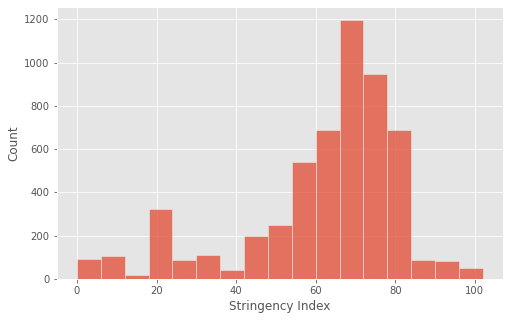

In [13]:
# Let's start off with the Stringency Index, here we are interested that in general, how strict was the world's
# response to the pandemic?

binsize = 6
bins = np.arange(0, df['STRINGENCY_INDEX'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color=color)
plt.xlabel('Stringency Index')
plt.show()

As expected, we can see that majority of the world's governments had a mid to strict response throughout the ongoing Pandemic. Majority of the data lies between a Stringency Index of around 50 to 80 with data that is left skewed. 
The Stringency Index took on a large range of values and I'd like to get a better picture of how deep the skew really is - so next we shall perform a log transform of the data.

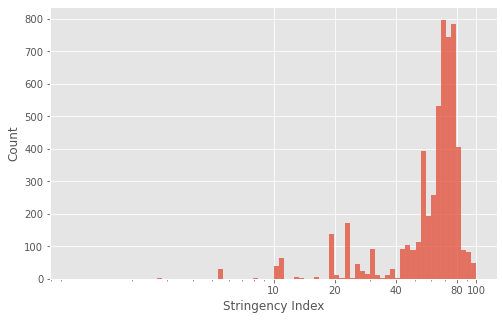

In [14]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['STRINGENCY_INDEX'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xscale('log')
plt.xticks([10, 20, 40, 80, 100], ['10','20','40','80','100'])
plt.xlabel('Stringency Index')
plt.show()

There seems to be possible outliers on the tailend of the graph, so let's set the x-limit to be 10 so we get a closer snapshot of the data.

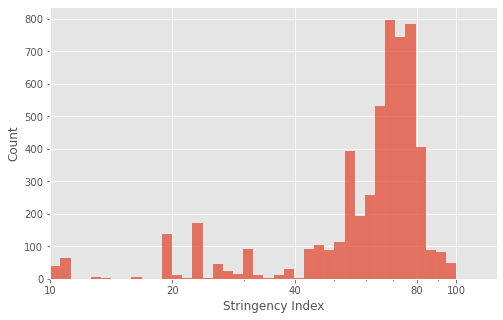

In [15]:
# Set xlimit to be 10 so that we can zoom in on the data
plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xscale('log')
plt.xticks([10, 20, 40, 80, 100], ['10','20','40','80','100'])
plt.xlabel('Stringency Index')
plt.xlim(10)
plt.show()

I'm actually quite interested in finding out later in the analysis which countries actually had the least amount of government controls enabled to control the pandemic (i.e. Stringency Index < 20). Since we know that Sweden aimed for Herd Immunity rather than lockdown I'm expecting Sweden to come up in this list, and it will be interesting to see what other countries were easy on the restrictions.

Towards the far right of the graph, I'm expecting to see India and China as having the toughest lockdowns, we'll explore if the data backs up this assertion.

After finding out the above assertions, it will also be interesting to see if the level of Stringency had any affect on the case load and deaths.

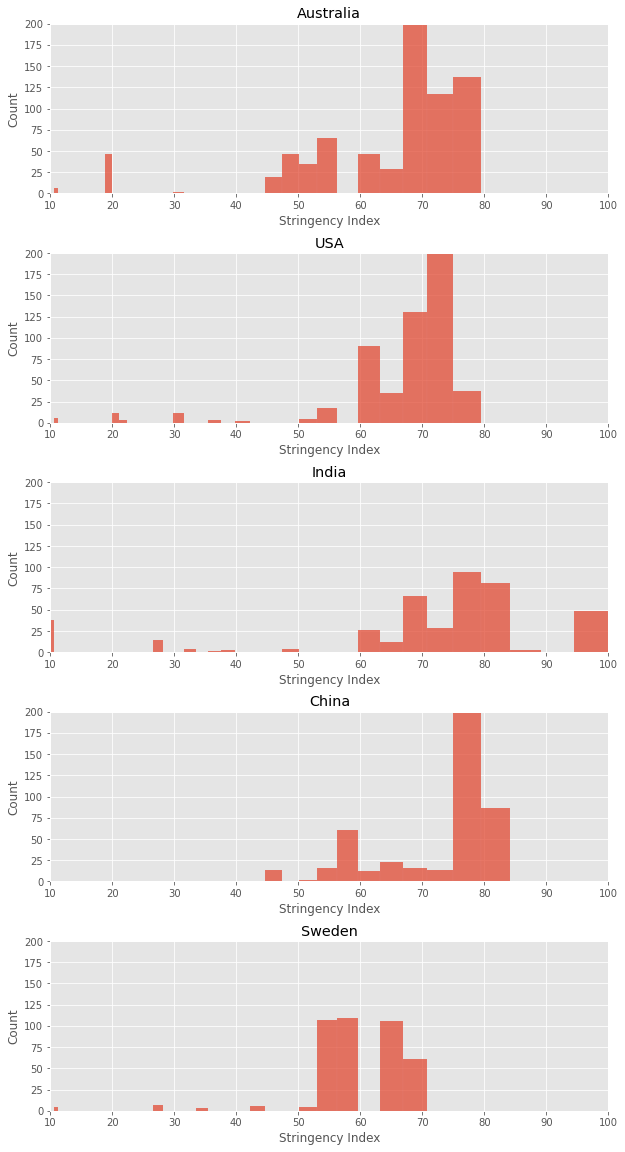

In [16]:
# Create country filters
australia_df = df[df['ISO'] == 'AUS']
usa_df = df[df['ISO'] == 'USA']
india_df = df[df['ISO'] == 'IND']
china_df = df[df['ISO'] == 'CHN']
sweden_df = df[df['ISO'] == 'SWE']

plt.figure(figsize = [10,20])
# Space apart the plots so they don't overlap each other
plt.subplots_adjust(hspace = 0.35)

plt.subplot(5,1,1)
sb.histplot(data = australia_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("Australia")
plt.xlim(10,100)
plt.ylim(0,200)

plt.subplot(5,1,2)
sb.histplot(data = usa_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("USA")
plt.xlim(10,100)
plt.ylim(0,200)

plt.subplot(5,1,3)
sb.histplot(data = india_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("India")
plt.xlim(10,100)
plt.ylim(0,200)

plt.subplot(5,1,4)
sb.histplot(data = china_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("China")
plt.xlim(10,100)
plt.ylim(0,200)

plt.subplot(5,1,5)
sb.histplot(data = sweden_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("Sweden")
plt.xlim(10,100)
plt.ylim(0,200);

# Save output for reference
#sweden_df.to_csv("output.csv")
country_list = ['AUS', 'USA', 'IND', 'CHN', 'SWE','GBR','KOR', 'TWN','ITA','PRT']#sweden_df.head()

#### Univariate Exploration - Categorical Variables

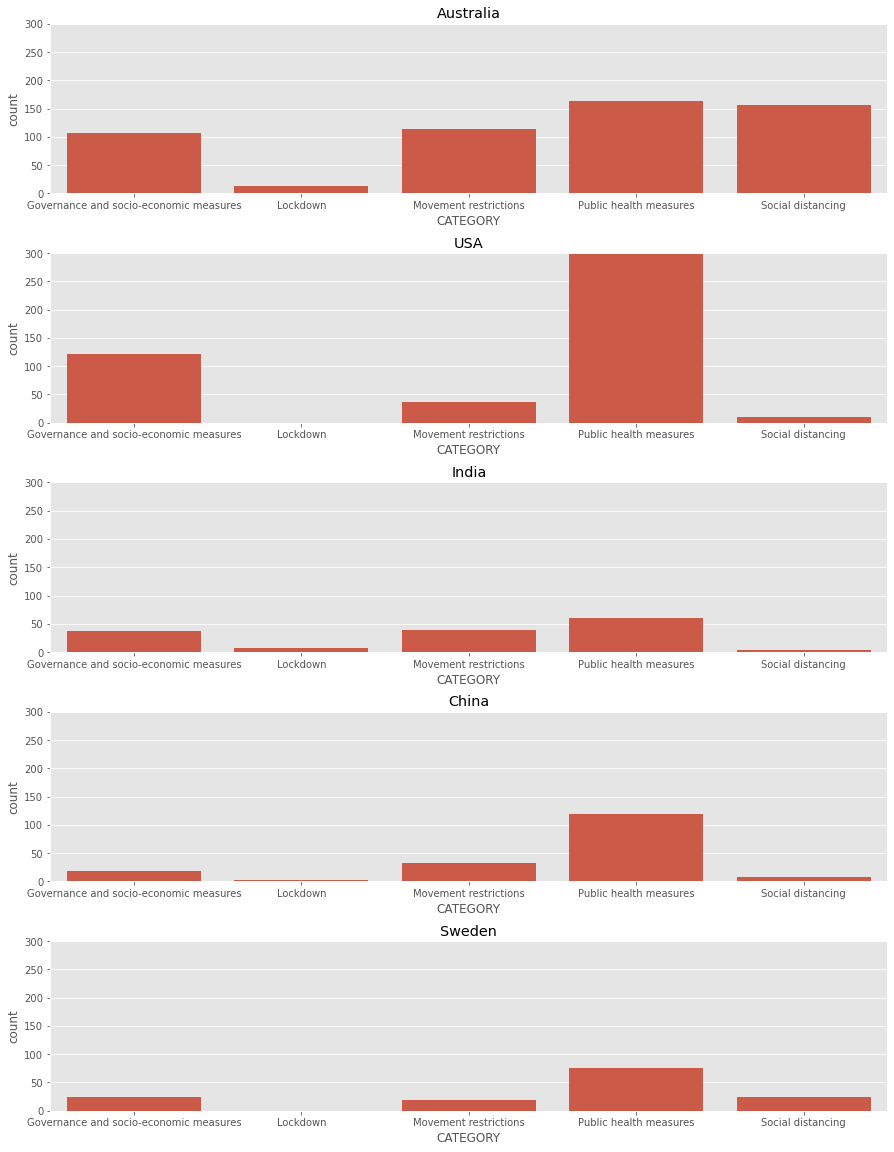

In [17]:
# Checking which pandemic control measures governments in countries of interest have taken the most

# Assigning 'fig', 'ax' variables.
plt.figure(figsize = [15,20])
# Space apart the plots so they don't overlap each other
plt.subplots_adjust(hspace = 0.35)

plt.subplot(5,1,1)
sb.countplot(data = australia_df, x = 'CATEGORY',color = color)
plt.title("Australia")
plt.ylim(0,300)

plt.subplot(5,1,2)
sb.countplot(data = usa_df, x = 'CATEGORY',color = color)
plt.title("USA")
plt.ylim(0,300)

plt.subplot(5,1,3)
sb.countplot(data = india_df, x = 'CATEGORY',color = color)
plt.title("India")
plt.ylim(0,300)

plt.subplot(5,1,4)
sb.countplot(data = china_df, x = 'CATEGORY',color = color)
plt.title("China")
plt.ylim(0,300)

plt.subplot(5,1,5)
sb.countplot(data = sweden_df, x = 'CATEGORY',color = color)
plt.title("Sweden")
plt.ylim(0,300);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The main variable of interest observed here was the Stringency Index. This is a composite measure of 9 different government response metrics over the dataset period of 24/02/20 to 15/2/21. With a left skew on the histogram, this indicates that across the dataset period, governments worldwide have taken a strict approach to controlling the pandemic - many nations have implemented lockdowns and mandatory face masks.  A log transformation was applied and the data looks Unimodal with highest peaks between 70 to 90.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Whilst investigating the data outliers were identified, these could be attributed to data entry error. To get a better overall view, data below Stringency Index of 10 was filtered out.

For the plotting of the Univariate Categorical Variables, it's worth mentioning that the accuracy of the graphs is dependent on the data being available and provided by the data source. These graphs list the frequency of the preventative measures taken but do not represent how long each measure lasted. Furthermore it is an indication of which measures the governments has relied on the most compared to other countries.

## Bivariate Exploration

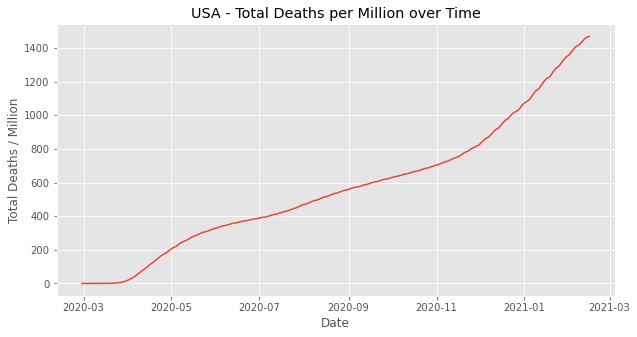

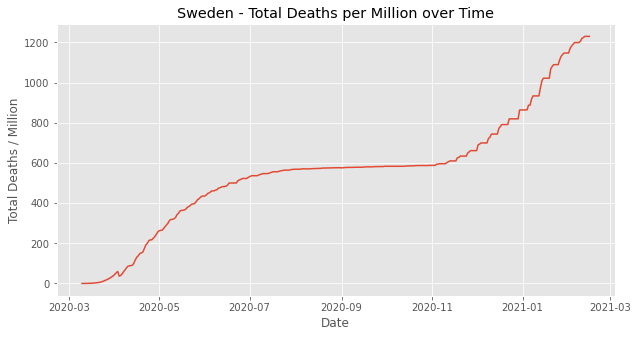

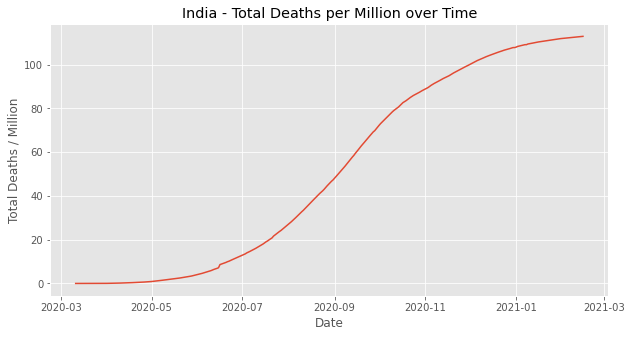

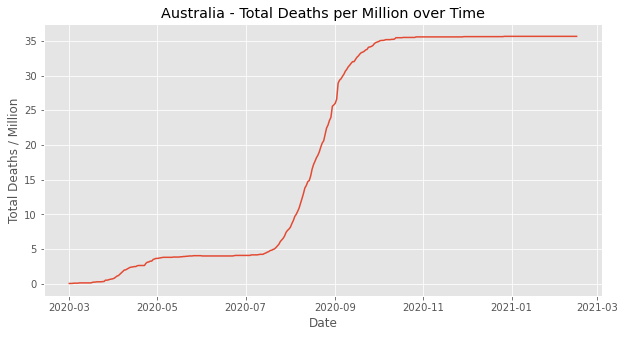

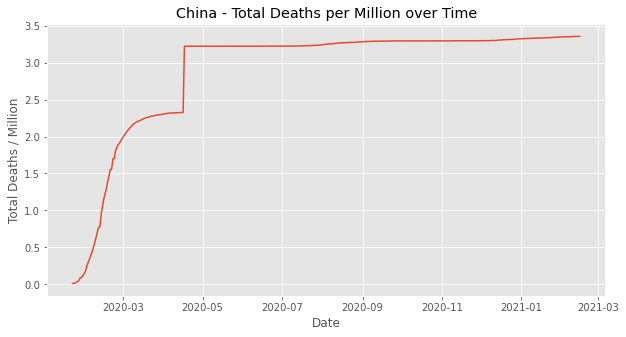

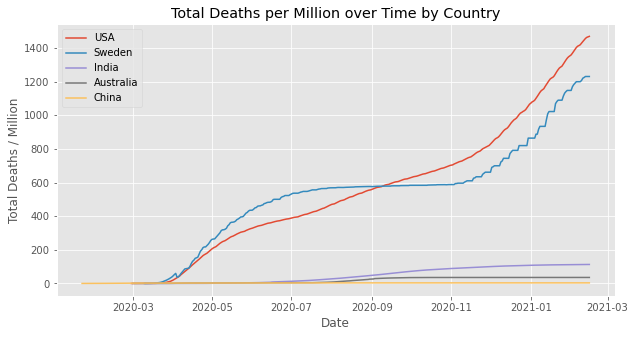

In [18]:
# Let's model the total deaths per million against each country

# USA
plt.figure(figsize=(10,5))
plt.errorbar(data = usa_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("USA - Total Deaths per Million over Time")
plt.show()

# Sweden
plt.figure(figsize=(10,5))
plt.errorbar(data = sweden_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Sweden - Total Deaths per Million over Time")
plt.show()

# India
plt.figure(figsize=(10,5))
plt.errorbar(data = india_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("India - Total Deaths per Million over Time")
plt.show()

# Australia
plt.figure(figsize=(10,5))
plt.errorbar(data = australia_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Australia - Total Deaths per Million over Time")
plt.show()

# China
plt.figure(figsize=(10,5))
plt.errorbar(data = china_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("China - Total Deaths per Million over Time")
plt.show()

# Combined
legend_label = ['USA', 'Sweden', 'India', 'Australia', 'China']
plt.figure(figsize=(10,5))
plt.errorbar(data = usa_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = sweden_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = india_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = australia_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = china_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths per Million over Time by Country")
plt.legend(labels = legend_label)
plt.show()


Now let's look at the number of deaths per million versus the number of cases per million against each country.

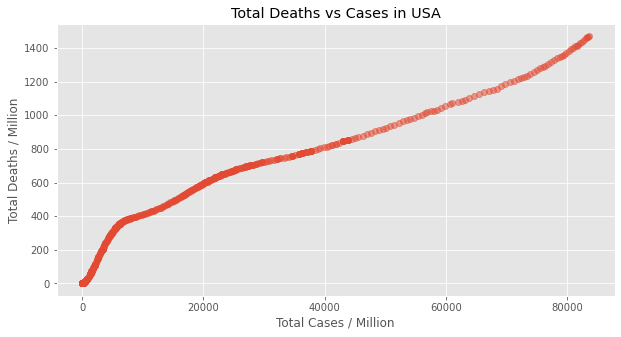

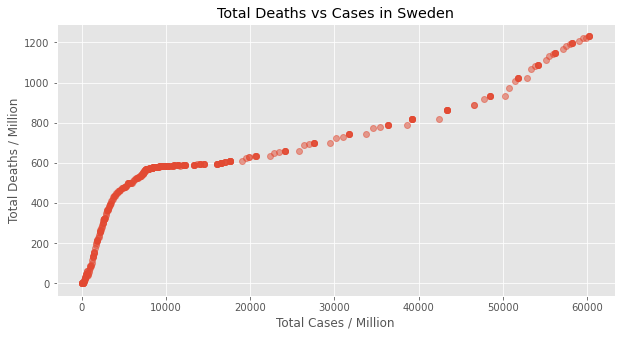

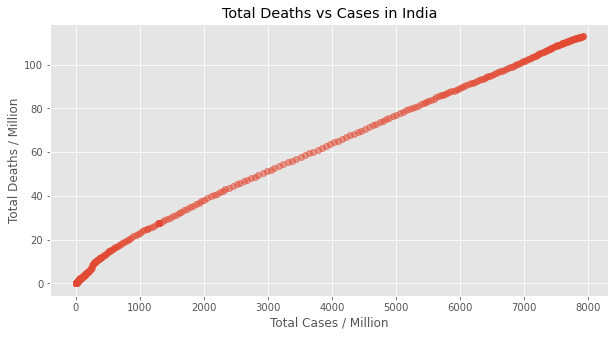

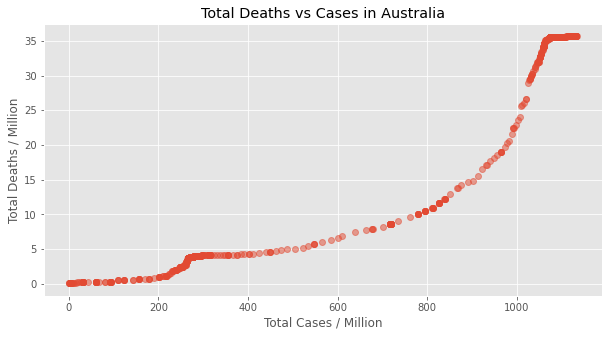

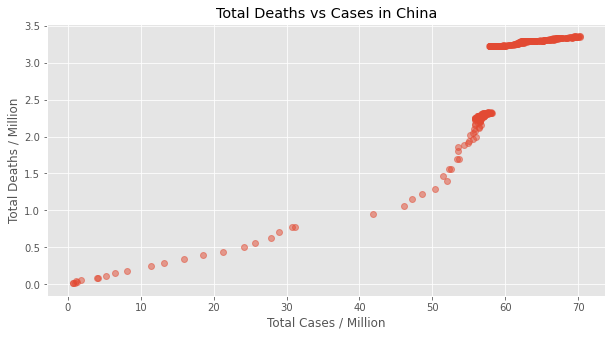

In [19]:
# Scatter plot showing positive correlations
plt.figure(figsize=(10,5))
sb.regplot(data = usa_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in USA");

plt.figure(figsize=(10,5))
sb.regplot(data = sweden_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in Sweden");

plt.figure(figsize=(10,5))
sb.regplot(data = india_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in India");

plt.figure(figsize=(10,5))
sb.regplot(data = australia_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in Australia");

plt.figure(figsize=(10,5))
sb.regplot(data = china_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in China");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

To achieve a fair comparison on the performance of each country in handling the pandemic, the Total Death rate was not used, instea the Total Deaths for every million population was chosen. This provides for a fair comparison considering countries have different population levels.

The total deaths per million up til Mid-Spring, April, was almost zero, however after April we see a sharp exponential spread in the virus resulting in more deaths per million - in a span of a year the resulting deaths grew up to a factor of almost 1500. It's worth mentioning that the rate of deaths were greater during the Winter months rather than other seasons - the rate of growth actually decreased the beginning of Summer. This is due to viral particles being more likely to remain in suspension in the air during the Winter months as opposed to other months.

Sweden is also equally bad, it's worth mention from November 2020 onwards the growth has been staggered, this could be attributed to short periods of time where testing did not find any positive cases followed by positive cases soon after.

For India, the rate of growth increased greatly during the annual monsoon months of June to September, and remained as such until the curve showed signs of flattening from November 2020 onwards. It's also worth mentioning, given the data, the factor of growth in the number of deaths was close to 90 - a much better result than USA and Sweden which opted against having lockdowns. Closer towards March 2021 India is on track towards flattening the curve and beginning its economic recovery.

Out of all the countries discussed so far, Australia has done amazing in flattening the curve, this was achieved by May 2020 followed by a period of increase in deaths, and finally the curve flattening again by October 2020.

And finally, China has done an excellent job in controlling the pandemic, a notable observation is a large jump in the number of deaths just after April 2020 before flattening again.

Other relationships observed was the total number of death per million, and the total cases per million. The death rate for Covid-19 in the USA was calculated to be, on average, 2.25%. To calculate this, the death rates was calculated at 3 separate points, at total cases/million from 20000, 40000 and 80000 before taking an average.

## Multivariate Exploration

The main ideas I intend on exploring is whether the anti-pandemic measures taken by the government, and the stringency, had any affect on the number of deaths in a country during the initial days of the pandemic.

In [20]:
numeric_vars = ['STRINGENCY_INDEX','POPULATION','POPULATION_DENSITY','MEDIAN_AGE'
                ,'GDP_PER_CAPITA','CARDIOVASC_DEATH_RATE', 'HUMAN_DEVELOPMENT_INDEX',
                'DIABETES_PREVALENCE']
                  
country_list = ['USA', 'SWE' 'IND', 'AUS' 'CHN']
countries_df = df[df['ISO'].isin(country_list)]

# Print for debug
countries_df.to_csv("test.csv")

The following is a multivariate graph of deaths over time with color encoding to represent the anti-pandemic measures the United States government has taken.

Multiple measures were enacted on the same days, so to ensure there is a representation of all measures, y-jitter has been applied so that neither overlaps the other, duplicate measures recorded in the data for the same dates have also been removed and only the period between March to May is being shown.

An observation being the USA has not implemented any lockdown measures.

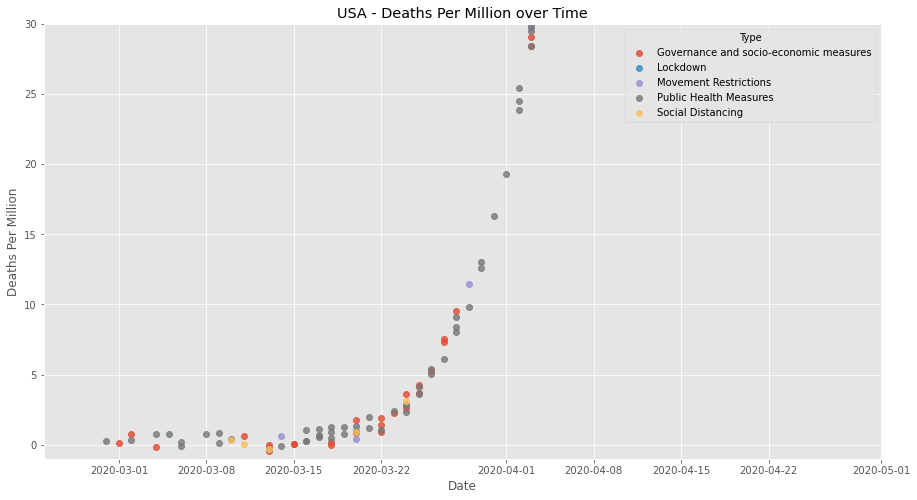

In [21]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = usa_df[usa_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.9)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("USA - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 30)
plt.xlim(dt.date(2020, 2, 24), dt.date(2020, 5, 1));

The following is a multivariate graph of deaths over time with color encoding to represent the anti-pandemic measures the Australian government has taken.

Multiple measures were enacted on the same days, so to ensure there is a representation of all measures, y-jitter has been applied so that neither overlaps the other, duplicate measures recorded in the data for the same dates have also been removed and only the period between March to August is being shown.

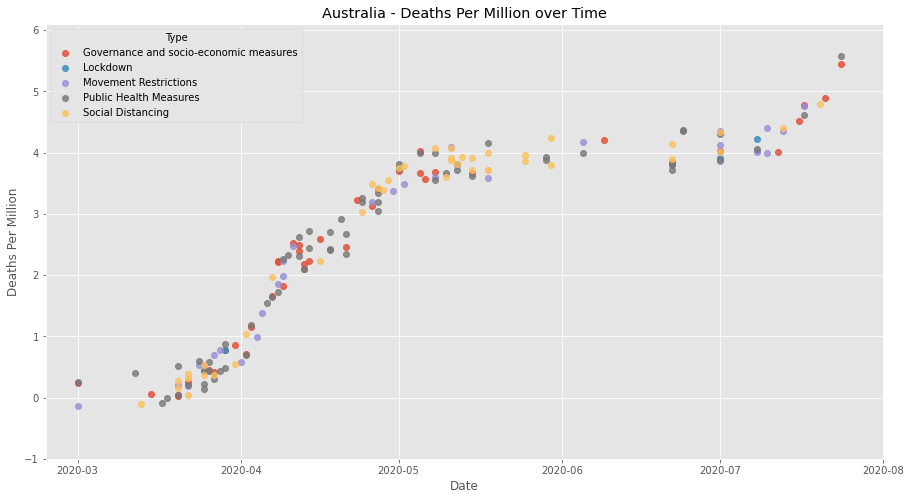

In [22]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = australia_df[australia_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("Australia - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 6.1)
plt.xlim(dt.date(2020, 2, 24), dt.date(2020, 8, 1));

The following is a multivariate graph of deaths over time with color encoding to represent the anti-pandemic measures the China government has taken.

Multiple measures were enacted on the same days, so to ensure there is a representation of all measures, y-jitter has been applied so that neither overlaps the other, duplicate measures recorded in the data for the same dates have also been removed and only the period between February to November is being shown.

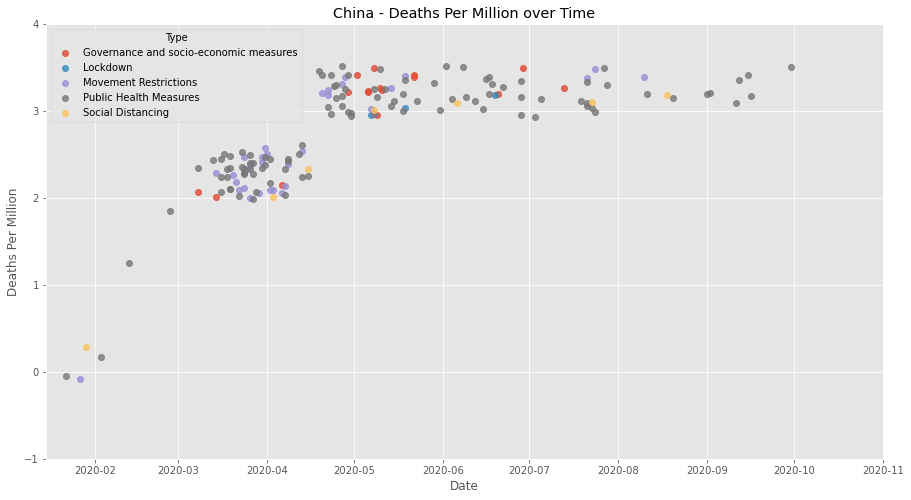

In [23]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = china_df[china_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("China - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 4)
plt.xlim(dt.date(2020, 1, 15), dt.date(2020, 11, 1));

The following is a multivariate graph of deaths over time with color encoding to represent the anti-pandemic measures the Indian government has taken.

Multiple measures were enacted on the same days, so to ensure there is a representation of all measures, y-jitter has been applied so that neither overlaps the other, duplicate measures recorded in the data for the same dates have also been removed and only the period between March to August is being shown.

Compared to other nations, India has enacted more lockdown measures.

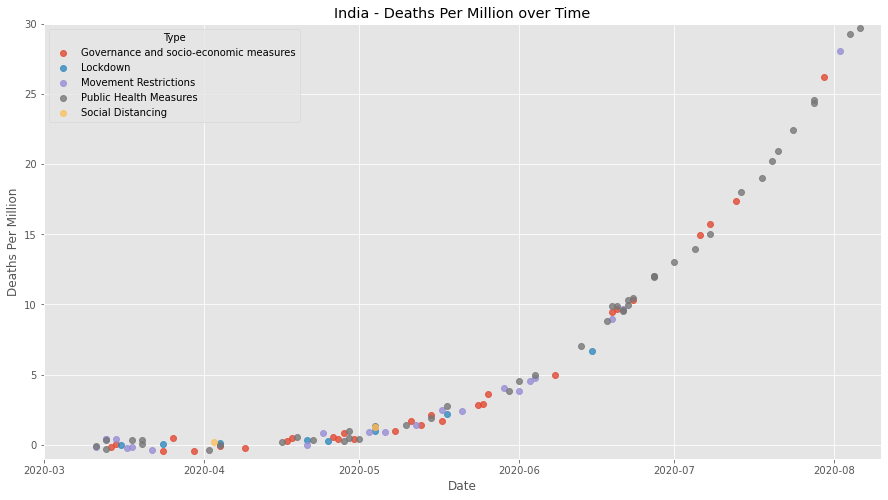

In [24]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = india_df[india_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.5)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("India - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 30)
plt.xlim(dt.date(2020, 3, 1), dt.date(2020, 8, 10));

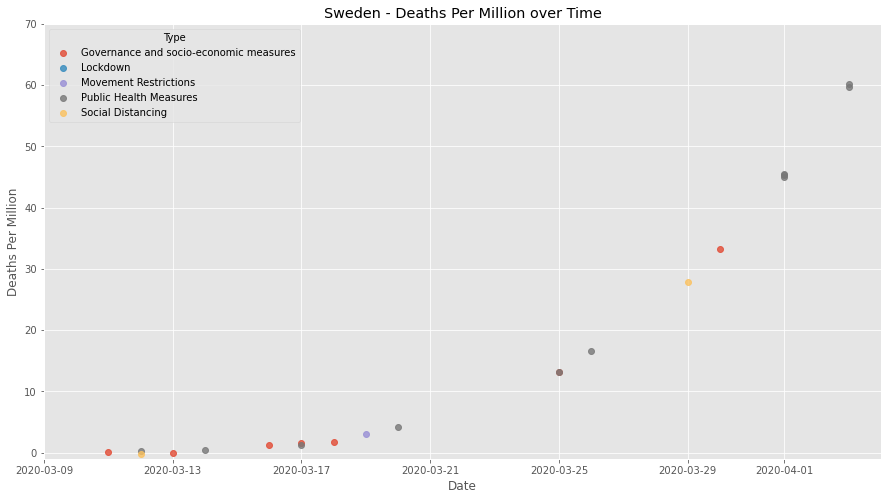

In [31]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = sweden_df[sweden_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.5)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("Sweden - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 70)
plt.xlim(dt.date(2020, 3, 9), dt.date(2020, 4, 4));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended the investigation of the exponential increase in deaths and the eventual flattening of the curve by looking at the anti-pandemic measures implemented by a country's government. The multivariate exploration in this section showed that the measures taken did have a positive impact in flattening the curve, however noting that there is a 14-day window period upon acquisition of the virus to showing visible symptoms - therefore the implementation of a measure does not result in lower number of cases soon after.

#### USA
During the data period analyzed, the US primarily relied on 'Public Health Measures' followed by 'Governance and socio-economic measures'. This involved effort such as: Strengthening the public health system by way of more ventilators, awareness campaigns and economic stimulus. No lockdowns were implemented and minimal amount of momvement restrictions enforced or social distancing. 

This is supported by the fact that the political climate in the US was of the view to keep the country open. Unsurprisingly, this resulted in exponential growth of the virus and allowing US to become the worst affected country.

#### Australia
During the data period analyzed, Australia's approach can be considered balanced. The government implemented all forms of measures. Australia placed a lot of emphasis on social distancing, economic stimulus (i.e. JobKeeper and JobSeeker programs) along with implementing lockdowns, this resulted in flattening the curve and keeping the deaths per million to be minimal at only 6. Movement restrictions were also strict which wasn't the case in the United States.

#### China
During the data period analyzed, China's approach can be considered the 'Nuclear Option'. The government heavily implemented movement restrictions and public health measures. Social distancing was also enforced however due to the movement restrictions, this was in effect by default. The combination of these resulted in China quickly flattening the curve and maintaining it - as per the provided data by their government.

#### India
During the data period analyzed, India's approach relied on implementing more lockdowns than other countries under comparison, movement restrictions and public health measures such as health screenings and border crossings, awareness campaigns and strengthening the public health system.

#### Sweden
Sweden hardly employed many measures at all, as the government was betting on herd immunity. The few measures that were employed consisted primarily of economic and public health measures. Unsurprisingly, COVID-19 is out of control in the country. 


### Were there any interesting or surprising interactions between features?
No interactions could be noticed, however, based on the time periods under observation (due to the large number of data, the time period had to be restricted for each country), it seems clear that implementing strong movement restrictions in conjunction with public health measures (i.e. increased testing, airport health screening etc.) and lockdowns is the most effective approach in controlling the spread of the virus.